In [2]:
# 找到若干文件的path

import os
import pandas as pd

prefix ='artifacts/results'
video_list  = ['video1','video2']
trace_list = ['fcc-test','fcc','5g','norway','oboe','ghent']
model = ['bba','genet','mpc','NetLLM']
# 结构: results[video][trace][model] = {'average_bitrate': ..., 'total_rebuf': ..., 'average_smoothness': ..., 'average_reward': ...}
results = {}

for video in video_list:
    results[video] = {} 
    for trace_name in trace_list:
        print("带宽数据集:",trace_name)
        trace_path = os.path.join(prefix,trace_name+'_'+video)
        file_path = os.path.join(trace_path,os.listdir(trace_path)[0])
        results[video][trace_name] = {}
        for m in model:
            if m=='NetLLM':
                csv_path = os.path.join(file_path,m)
            else:
                csv_path = os.path.join(file_path,m,'seed_100003')
        # 选择不同的model
            print(f'选择模型:{m}')
            csv_list = os.listdir(csv_path)
            print(csv_list)
            # 初始化累积变量
            total_bitrate = 0.0
            total_rebuf = 0.0
            total_smoothness = 0.0
            total_reward = 0.0
            count = 0  # 用于计算平均值
            for csv in csv_list:
                with open(os.path.join(csv_path,csv),'r') as f:
                    first_line = True
                    for line in f:
                        line = line.strip().split('\t')
                        if len(line) <4:
                            continue
                        if first_line:
                            first_line = False
                            continue
                        # 分别是time_stamp,bit_rate,buffer_size,rebuf,video_chunk_size,download_time,smoothness,reward
                        bitrate = float(line[1])
                        rebuf = float(line[3])
                        smo = float(line[-2])
                        reward = float(line[-1])
                        total_bitrate += bitrate
                        total_rebuf += rebuf
                        total_smoothness += smo
                        total_reward += reward
                        count += 1
            average_bitrate = total_bitrate / count
            total_rebuffer_time = total_rebuf  # 总重缓冲时间
            average_smoothness = total_smoothness / count
            average_reward = total_reward / count
            
            # 存储结果
            results[video][trace_name][m] = {
                'average_bitrate': average_bitrate,
                'total_rebuffer_time': total_rebuffer_time,
                'average_smoothness': average_smoothness,
                'average_reward': average_reward
            }
            # print(f"模型 {m} 的结果: 平均码率={average_bitrate:.2f} kbps, 总重缓冲时间={total_rebuffer_time:.2f} s, 平均平滑度={average_smoothness:.2f}, 平均奖励={average_reward:.2f}")
        print("-----------------")
    print(f"==========={video}=============")

colums = [
    'time_stamp',
    'bit_rate',
    'buffer_size',
    'rebuf',
    'video_chunk_size',
    'download_time',
    'smoothness',
    'reward',
]
import csv

output_file = 'abr_algorithm_comparison.csv'
with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['video', 'trace', 'model', 'average_bitrate_kbps', 'total_rebuffer_time_s', 'average_smoothness', 'average_reward']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for video, traces in results.items():
        for trace, models_data in traces.items():
            for model, metrics in models_data.items():
                writer.writerow({
                    'video': video,
                    'trace': trace,
                    'model': model,
                    'average_bitrate_kbps': f"{metrics['average_bitrate']:.2f}",
                    'total_rebuffer_time_s': f"{metrics['total_rebuffer_time']:.2f}",
                    'average_smoothness': f"{metrics['average_smoothness']:.2f}",
                    'average_reward': f"{metrics['average_reward']:.2f}"
                })
print(f"结果已保存到 {output_file}")

带宽数据集: fcc-test
选择模型:bba
['result_sim_abr_fcc-test_078_trace_8747_http---www.amazon.com_960', 'result_sim_abr_fcc-test_091_trace_11332_http---www.facebook.com_960', 'result_sim_abr_fcc-test_017_trace_7451_http---www.yahoo.com_320', 'result_sim_abr_fcc-test_011_test_fcc_trace_5554_http---www.amazon.com_360_0', 'result_sim_abr_fcc-test_070_test_fcc_trace_14731_http---www.facebook.com_720_0', 'result_sim_abr_fcc-test_063_trace_799296_http---www.amazon.com_960', 'result_sim_abr_fcc-test_066_test_fcc_trace_805712_http---www.facebook.com_1140_0', 'result_sim_abr_fcc-test_001_test_fcc_trace_215364_http---www.ebay.com_600_0', 'result_sim_abr_fcc-test_010_test_fcc_trace_14731_http---www.facebook.com_1140_0', 'result_sim_abr_fcc-test_050_trace_207336_http---www.amazon.com_1280', 'result_sim_abr_fcc-test_029_test_fcc_trace_5554_http---www.amazon.com_1080_0', 'result_sim_abr_fcc-test_058_trace_797700_http---www.yahoo.com_960', 'result_sim_abr_fcc-test_024_test_fcc_trace_216810_http---www.facebook.

In [2]:
df = pd.read_csv('abr_algorithm_comparison.csv')
# df.head()
# Pivot data to form a table for each video, where rows are models and columns are traces
result = {}

for video in video_list:
    # Filter data for the current video
    video_data = df[df['video'] == video]
    # Pivot the table with model as rows and trace as columns
    pivot = video_data.pivot(index="trace", columns="model", values="average_reward")
    # Add to the result dictionary
    result[video] = pivot

# Save each pivoted table as a CSV file
csv_files = []
for video, table in result.items():
    file_path = f"{video}_processed.csv"
    table.to_csv(file_path)
    csv_files.append(file_path)

csv_files


['video1_processed.csv', 'video2_processed.csv']

/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/315812883.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/315812883.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/315812883.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/315812883.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

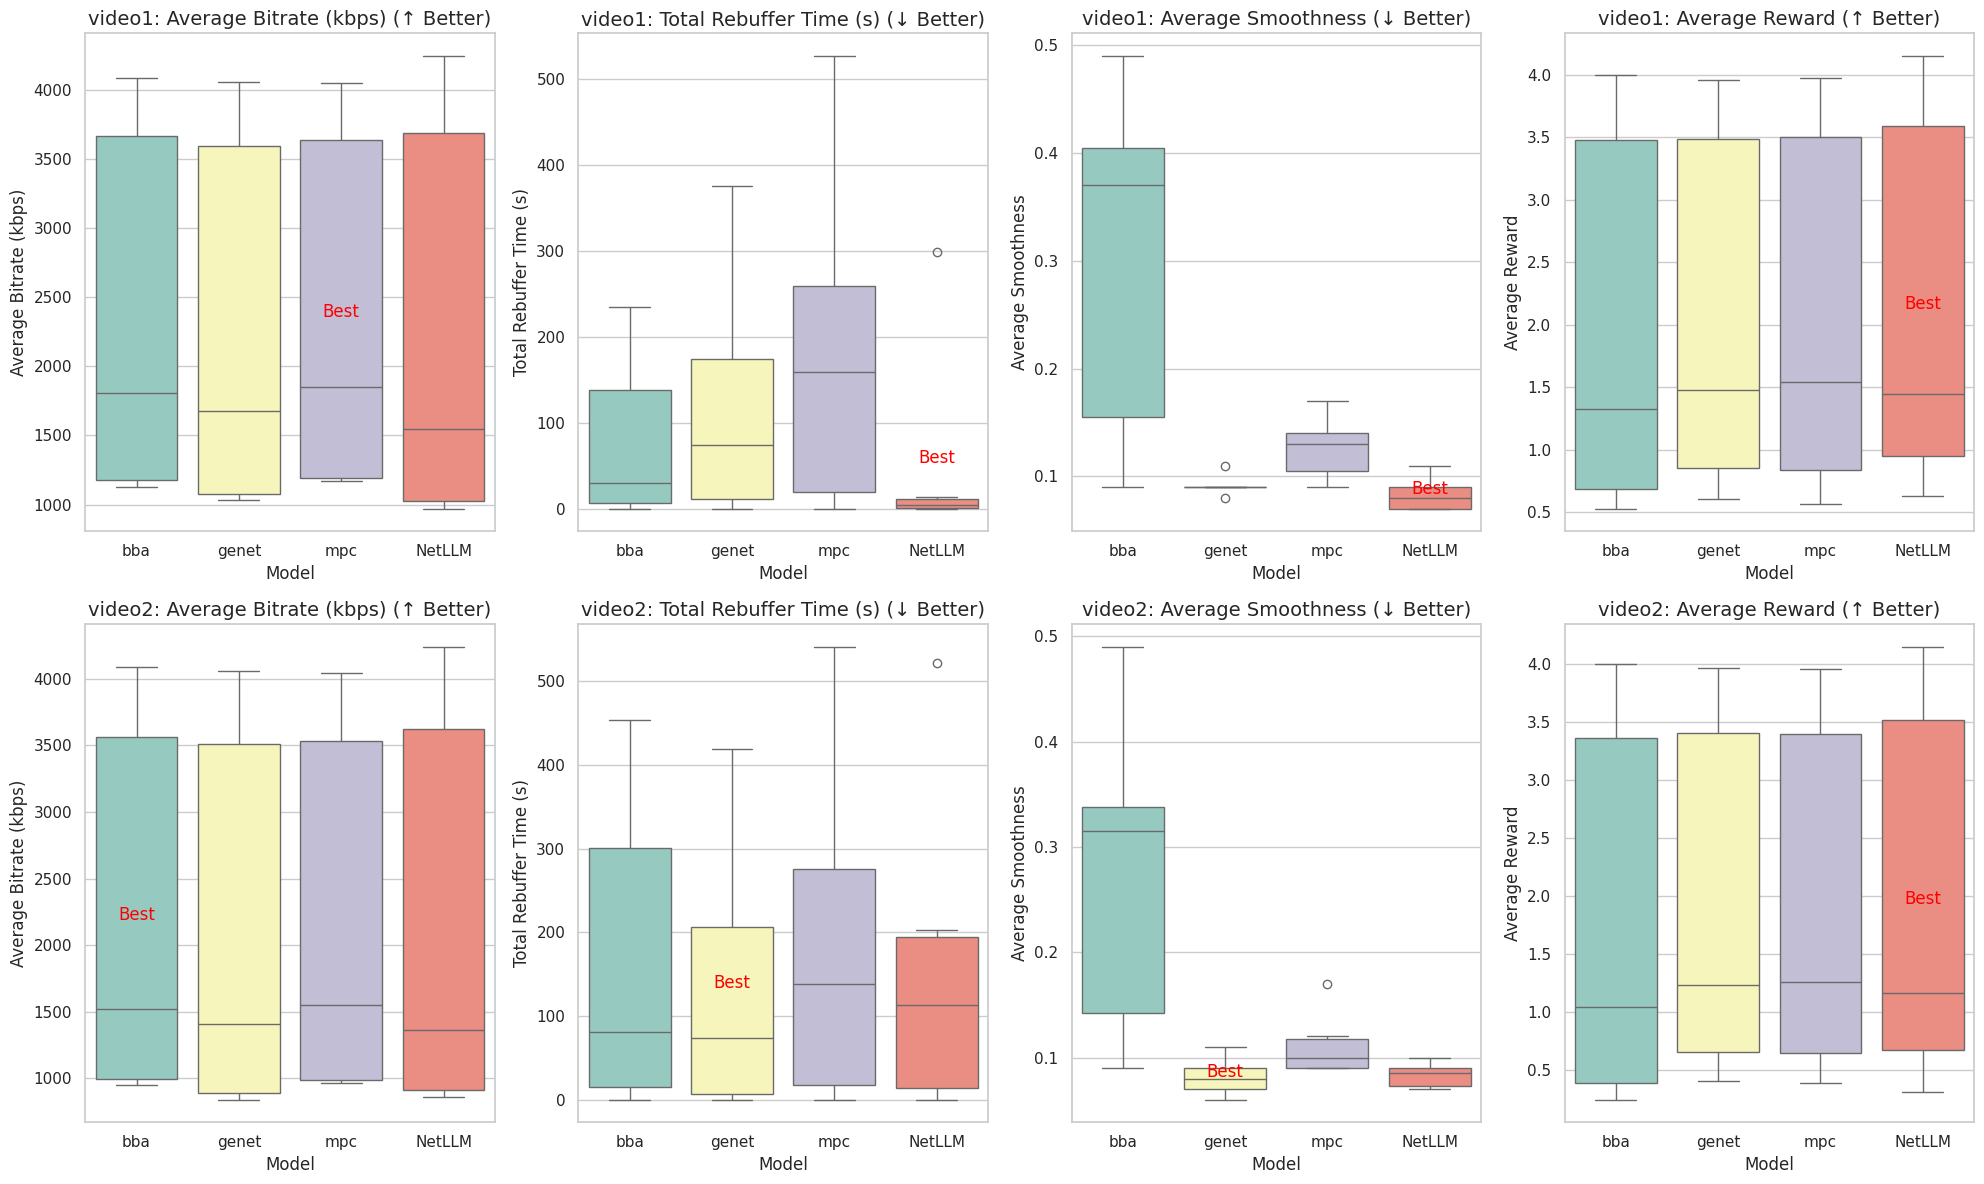

In [3]:
## 比较不同模型的平均码率

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置绘图风格
sns.set(style="whitegrid")

# 读取已有数据
df = pd.read_csv('abr_algorithm_comparison.csv')

# 定义指标列表
metrics = [
    ("average_bitrate_kbps", "Average Bitrate (kbps)", "↑ Better"),
    ("total_rebuffer_time_s", "Total Rebuffer Time (s)", "↓ Better"),
    ("average_smoothness", "Average Smoothness", "↓ Better"),
    ("average_reward", "Average Reward", "↑ Better"),
]

# 设置绘图风格
sns.set(style="whitegrid")

# 获取所有视频列表
videos = df["video"].unique()

# 创建画布
fig, axes = plt.subplots(len(videos), len(metrics), figsize=(20, 12), sharey=False)

# 遍历视频和指标分别绘图
for vid_idx, video in enumerate(videos):
    for metric_idx, (metric, ylabel, direction) in enumerate(metrics):
        ax = axes[vid_idx, metric_idx] if len(videos) > 1 else axes[metric_idx]
        
        # 筛选当前视频的数据
        video_data = df[df["video"] == video]
        
        # 绘制箱线图
        sns.boxplot(
            data=video_data,
            x="model",
            y=metric,
            palette="Set3",
            ax=ax,
        )
        
        # 设置标题和轴标签
        ax.set_title(f"{video}: {ylabel} ({direction})", fontsize=14)
        ax.set_xlabel("Model", fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        
        # 找到最佳模型（基于平均值判断）
        if direction == "↑ Better":
            best_model = video_data.groupby("model")[metric].mean().idxmax()
            best_value = video_data.groupby("model")[metric].mean().max()
        else:  # ↓ Better
            best_model = video_data.groupby("model")[metric].mean().idxmin()
            best_value = video_data.groupby("model")[metric].mean().min()
        
        # 标注最佳模型
        ax.text(
            list(video_data["model"].unique()).index(best_model),
            best_value,
            "Best",
            color="red",
            fontsize=12,
            ha="center",
        )

# 调整布局
plt.tight_layout()
plt.show()


/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/208343969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/208343969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/208343969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/data2-HDD-SATA-20T/awh/tmp/ipykernel_9215/208343969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

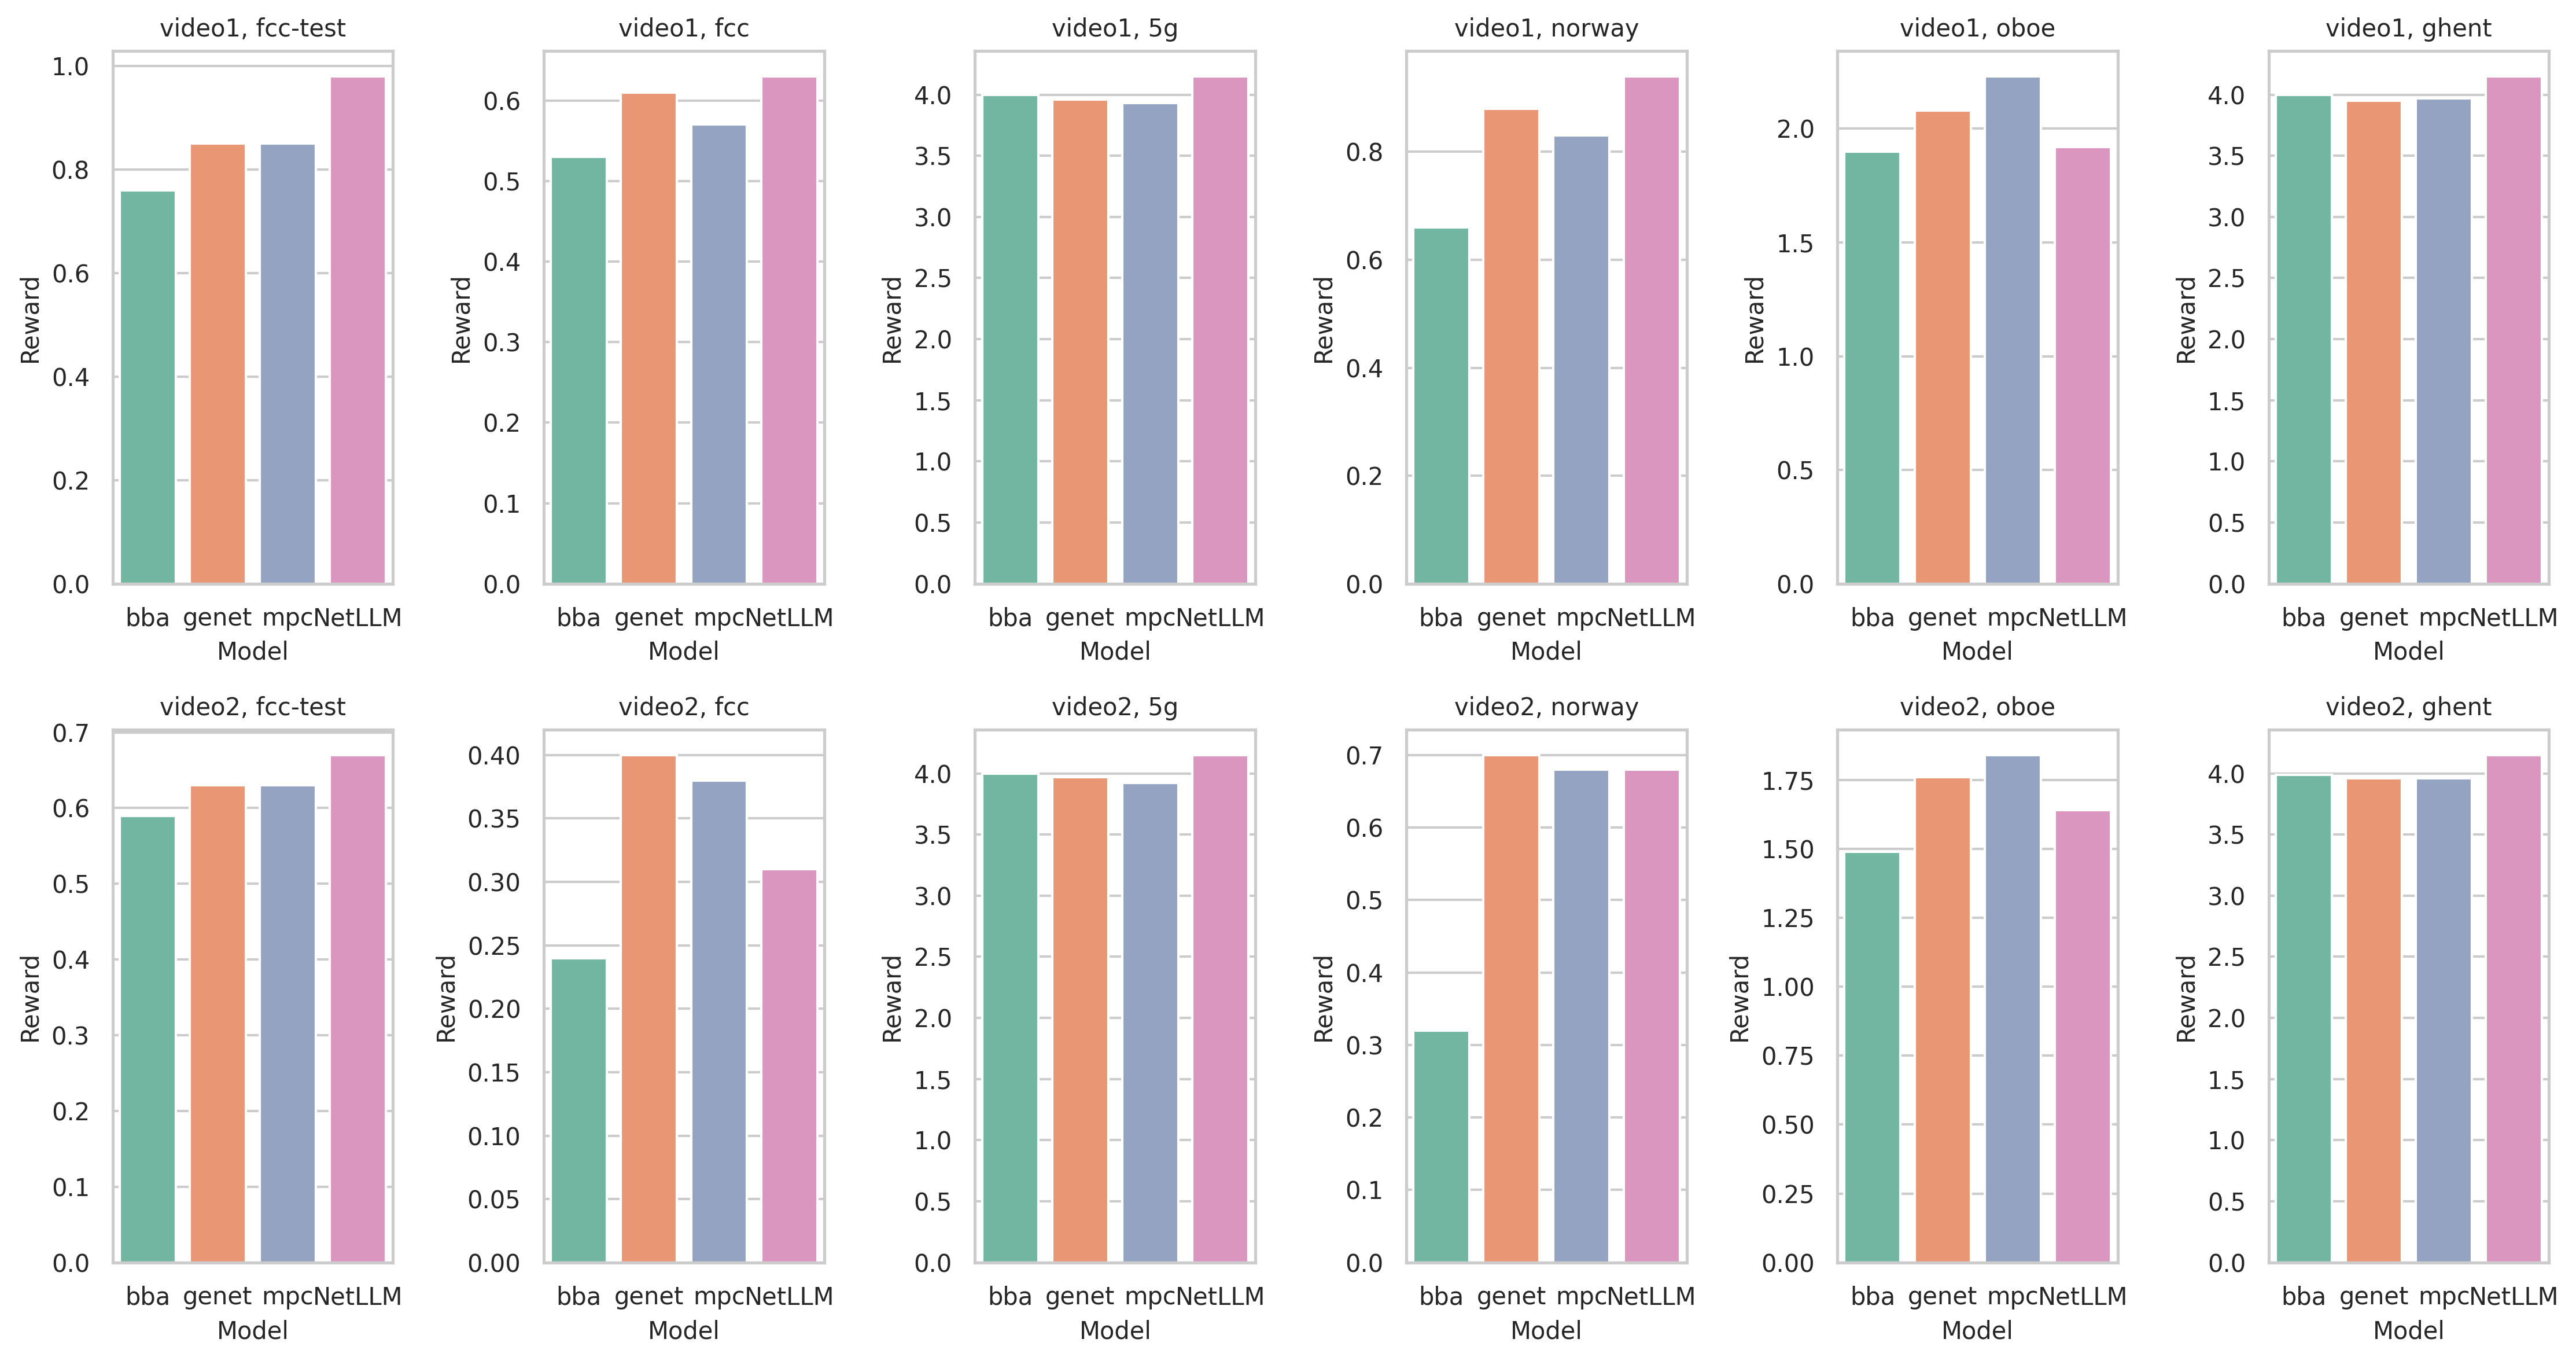

In [4]:
unique_traces = df['trace'].unique()
# Getting unique videos and traces for plotting
unique_videos = df["video"].unique()
num_traces = len(unique_traces)
# Further adjustments for smaller and finer plots
rows, cols = 2, num_traces  # Maintain the same grid structure
fig, axes = plt.subplots(rows, cols, figsize=(15, 8),dpi=300)  # Smaller figure size for compact layout
axes = axes.flatten()  # Flatten the grid for easier indexing
colors = sns.color_palette("Set2", len(df["model"].unique()))  # 使用新的调色板

# Creating very compact bar plots for each video and trace combination
plot_index = 0
for video in unique_videos:
    for trace in unique_traces:
        subset = df[(df["video"] == video) & (df["trace"] == trace)]
        if plot_index < len(axes):  # Ensure valid axis
            ax = axes[plot_index]
            sns.barplot(
                ax=ax,
                data=subset,
                x="model",
                y="average_reward",
                palette=colors
            )
            ax.set_title(f"{video}, {trace}", fontsize=10)  # Smaller title font
            ax.set_xlabel("Model", fontsize=10)  # Smaller labels
            ax.set_ylabel("Reward", fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            plot_index += 1

# Remove any extra subplots
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

# Final adjustments for tight layout
plt.tight_layout()
plt.show()

## 实际表现

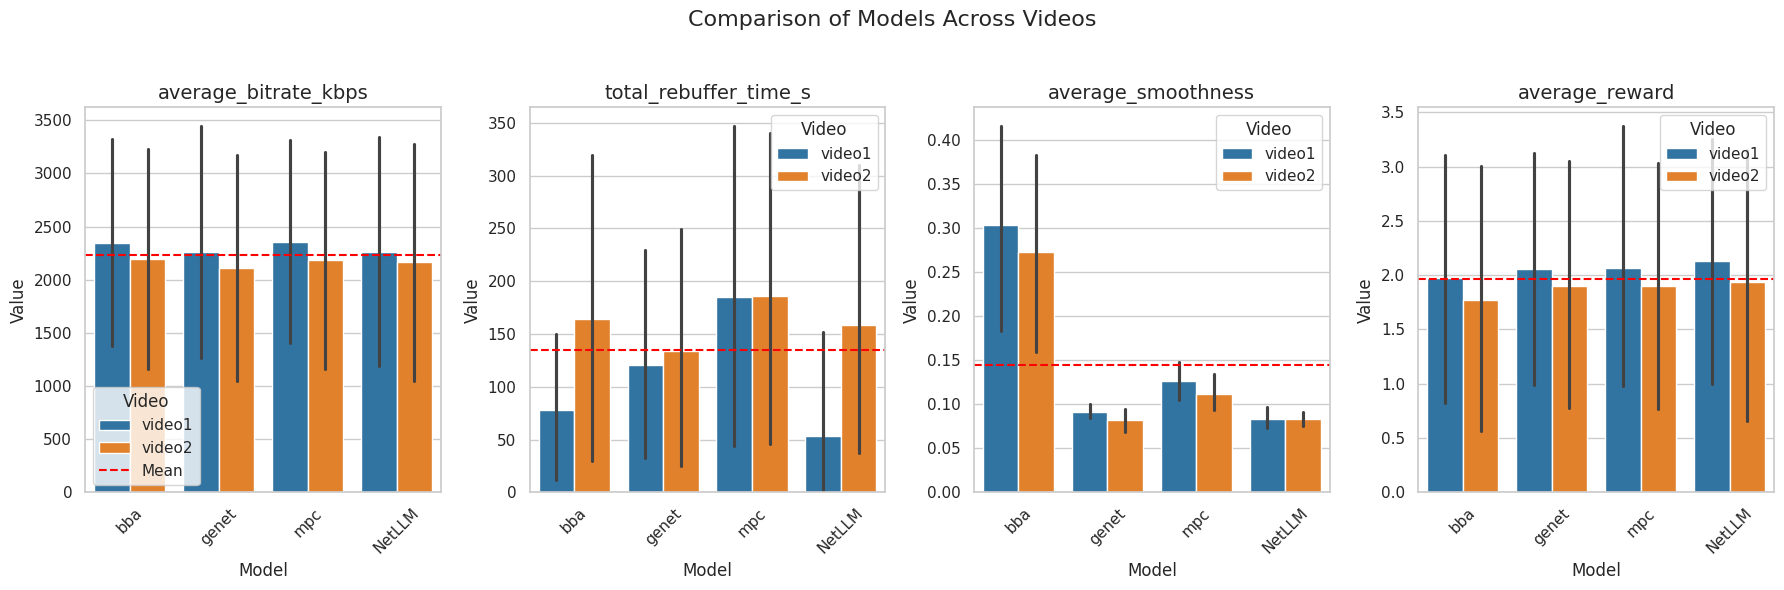

In [7]:
import warnings
warnings.filterwarnings('ignore')


output_file = 'abr_algorithm_comparison.csv'

# 读取保存的CSV文件
df = pd.read_csv('abr_algorithm_comparison.csv')# 设置绘图风格
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 数据准备
videos = df['video'].unique()
models = df['model'].unique()
metrics = ['average_bitrate_kbps', 'total_rebuffer_time_s', 'average_smoothness', 'average_reward']

# 创建自定义颜色（为每个模型分配颜色）
model_colors = {
    "bba": "#1f77b4",   # 蓝色
    "genet": "#ff7f0e", # 橙色
    "mpc": "#2ca02c"  ,  # 绿色
    "NetLLM": "#39404a"    # 绿色
}

# 创建画布
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), sharey=False)
fig.suptitle("Comparison of Models Across Videos", fontsize=16)

# 遍历每个metric绘制分组柱状图
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # 绘制分组柱状图
    sns.barplot(
        data=df, 
        x="model", 
        y=metric, 
        hue="video", 
        ax=ax, 
        dodge=True, 
        palette=[model_colors[m] for m in models]  # 使用自定义颜色
    )
    
    # 计算当前指标的平均值
    metric_mean = df[metric].mean()
    
    # 添加竖线，表示指标的平均值
    ax.axhline(
        y=metric_mean, 
        color="red", 
        linestyle="--", 
        linewidth=1.5, 
        label="Mean" if i == 0 else ""
    )
    
    # 设置标题和标签
    ax.set_title(metric, fontsize=14)
    ax.set_xlabel("Model", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.tick_params(axis="x", rotation=45)
    ax.legend(title="Video")

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()